In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
  

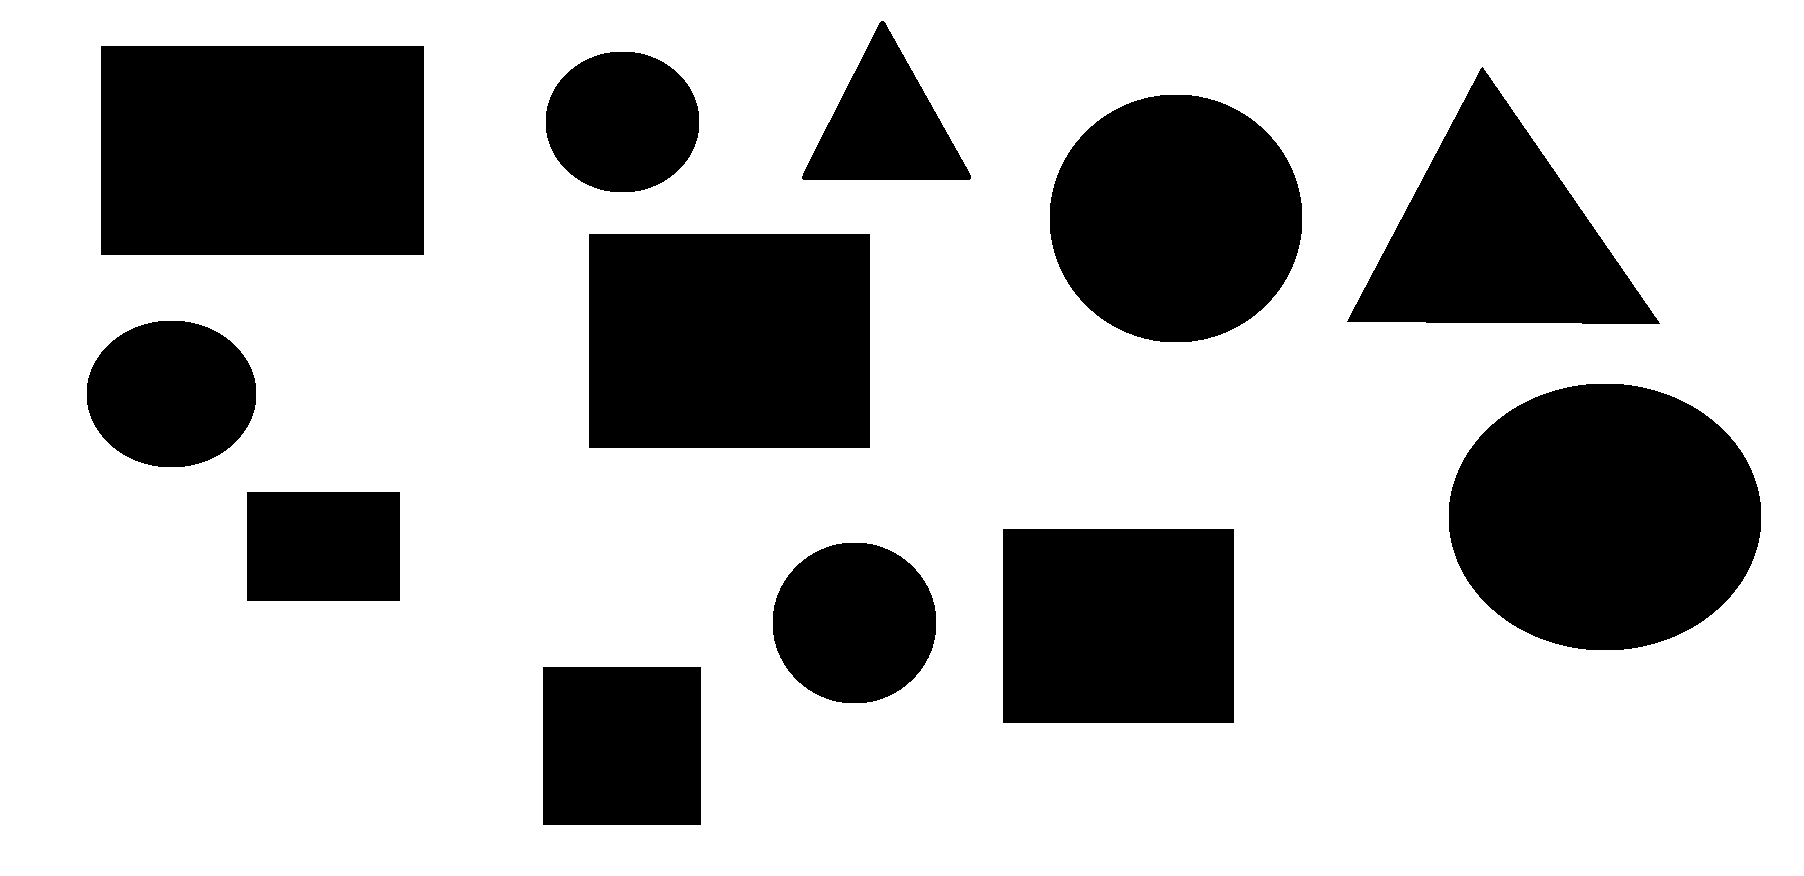

In [ ]:
# Le a imagem
img = cv2.imread('shapes.png')

# Imprime a imagem original
cv2_imshow(img)  

In [ ]:
# Transforma os canais RGB em tons de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Retira ruidos da imagem
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Acha todos os contornos pontudos em cada forma geometrica
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
i = 0

# Inicia variáveis para contar a quantidade de cada figura
triangulo_qtd = 0
quadrilatero_qtd = 0
circulo_qtd = 0


for contour in contours:
  
    if i == 0:
        i = 1
        continue
    
    # Calculas as 'Bounding Boxes'
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
    
    # Classifica como triangulo
    if len(approx) == 3:
        cv2.putText(img, 'Triangulo', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        triangulo_qtd += 1
  
    # Classifica como quadrilatero
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilatero', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        quadrilatero_qtd += 1
  
    # Classifica como circulo
    else:
        cv2.putText(img, 'Circulo', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        circulo_qtd += 1
  

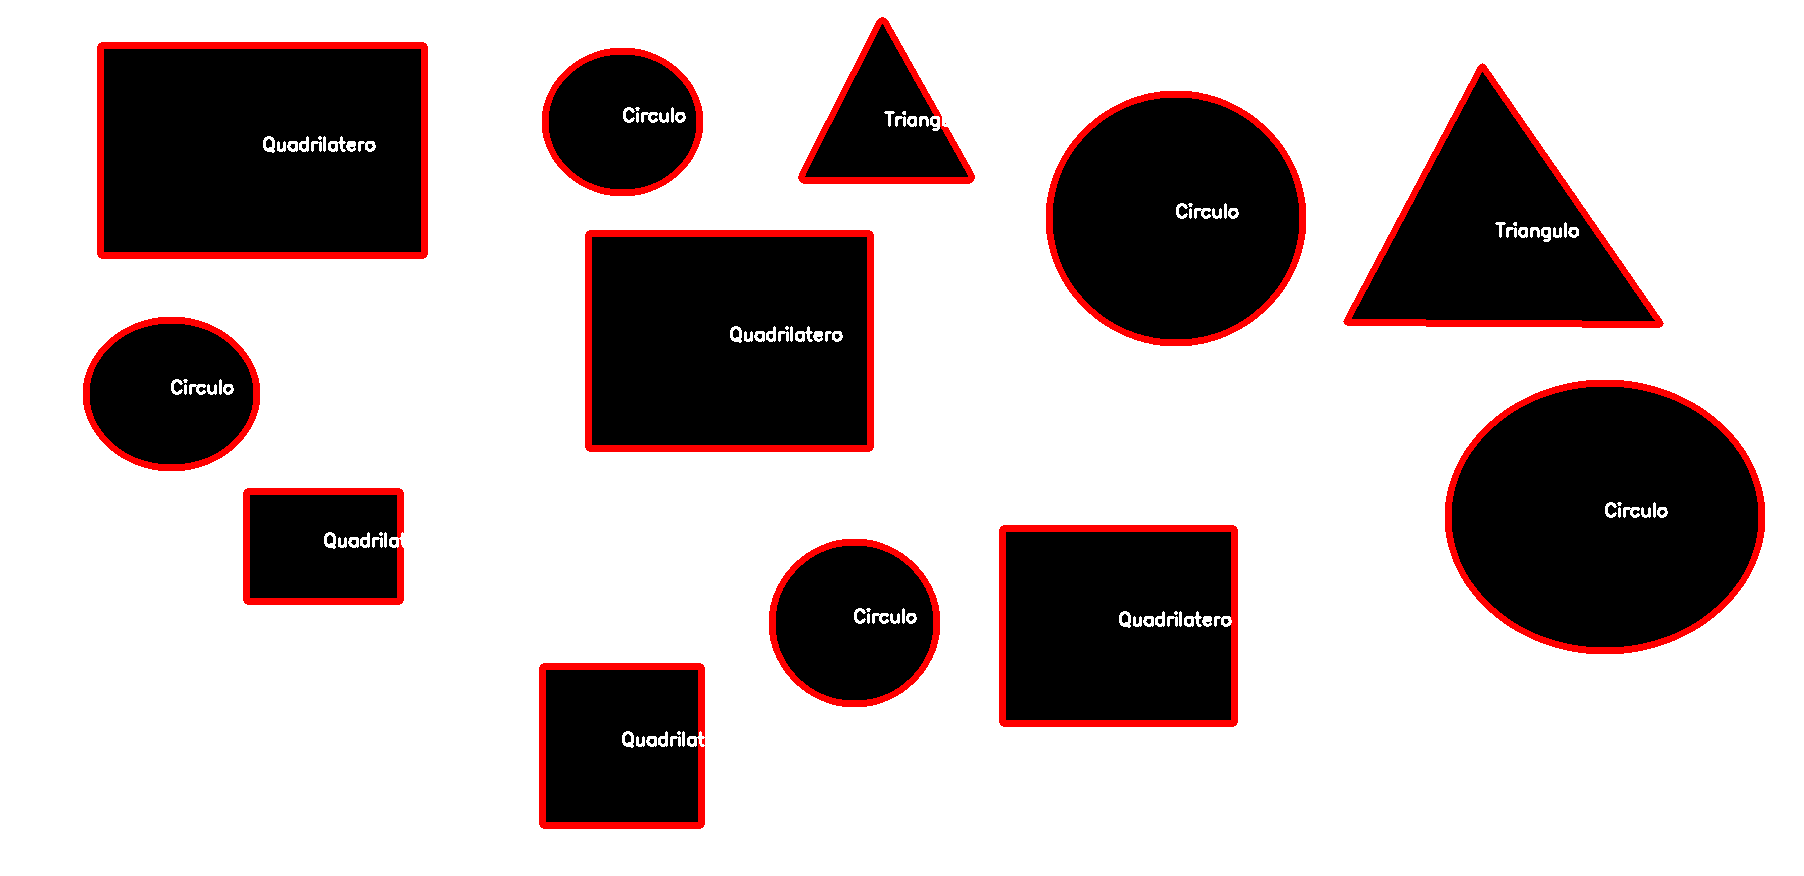

In [ ]:
# Imprime a nova imagem
cv2_imshow(img)

<BarContainer object of 3 artists>

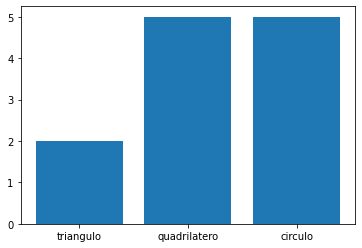

In [ ]:
# Define o conteúdo de cada eixo
x_label = ['triangulo', 'quadrilatero', 'circulo']
y_label = [triangulo_qtd, quadrilatero_qtd, circulo_qtd]

# Plota o grafico de barras
plt.bar(x_label, y_label)